# Fraudulent transactions detection with Keras and TensorFlow- Hyperparameter Tuning and Weight Regularization for Improved Model Performance 

#### [Author]: Yassine Sfaihi

# Background of the dataset:

The dataset contains transactions made by European credit cardholders in September 2013. The transactions have been transformed with PCA, with the exception of the 'Time' and 'Amount' features. The 'Class' feature represents whether a transaction is fraudulent (1) or not (0). The dataset is highly imbalanced, with only 0.172% of transactions being fraudulent.

# Problem statement and objective of the project:
 

The objective of the project is to develop a model that can accurately detect fraudulent credit card transactions. The problem is significant because false positive fraud detections can result in inconvenience for customers, while false negatives can result in monetary losses for the credit card company.

In this notebook, we will train a binary classification model to predict the "Class" column in a credit card dataset. The model will be built using Keras with TensorFlow as the backend, and the performance will be improved through hyperparameter tuning and weight regularization.

# Data Preparation

In [3]:
import pandas as pd 

In [4]:
df=pd.read_csv("/home/yassine/Downloads/creditcard.csv")

In [5]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (284807, 31)


In [204]:
# Overview of the data
print("Overview of the data:" )
df.head()

Overview of the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175005,122162.0,1.913351,0.379815,-0.878497,3.599326,0.787740,0.909389,-0.049016,0.178154,-0.834806,...,0.084564,0.342333,0.041306,0.182720,0.184600,0.077320,-0.037619,-0.059467,7.56,0
259162,158991.0,-5.079688,-3.085371,-4.053290,0.310538,3.507393,-0.229835,1.526065,-0.691351,1.408176,...,-1.041825,0.990240,1.567415,-1.096102,-1.223628,0.469088,-0.281352,2.649827,160.00,0
96296,65704.0,0.906218,-1.098374,0.825706,0.613545,-1.384232,0.291467,-0.820311,0.284303,-0.504918,...,-0.077426,0.004004,-0.122906,0.181771,0.288475,-0.233871,0.052715,0.045439,158.00,0
181944,125192.0,-1.950316,0.964217,0.159607,-2.142268,0.001737,-0.568556,0.347199,1.015335,-0.371888,...,-0.217610,-1.106515,-0.185501,0.681057,0.536678,0.880489,-0.279808,-0.104760,39.00,0
275457,166542.0,-0.089938,0.511432,0.883198,-0.647320,-0.296266,-0.421553,0.408877,-0.038751,0.519104,...,-0.158415,-0.554058,0.296128,1.117239,-0.927755,0.077088,-0.260669,0.018302,41.93,0


In [7]:
print("Data Types of columns:", df.dtypes)



Data Types of columns: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [8]:
print("Description of the dataset:" )
df.describe()


Description of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Distribution of the target variable

### Plotting the distribution of the target variable using seaborn


In [6]:
# Calculating the class counts and percentage
class_counts = df['Class'].value_counts()
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

# Printing the class counts and percentage
print("Class counts: \n", class_counts)
print("\nClass counts percentage: \n", class_counts_percentage)


Class counts: 
 0    284315
1       492
Name: Class, dtype: int64

Class counts percentage: 
 0    99.827251
1     0.172749
Name: Class, dtype: float64


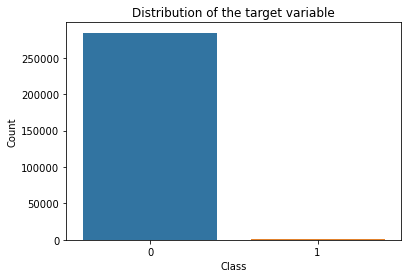

In [11]:
import seaborn as sns

#Plotting the count of each class in the target variable
sns.countplot(x='Class', data=df)

#Adding the title, x-axis label and y-axis label to the plot
plt.title("Distribution of the target variable")
plt.xlabel("Class")
plt.ylabel("Count")

#Displaying the plot
plt.show()

In [7]:
class_counts = df['Class'].value_counts()
print(class_counts)


0    284315
1       492
Name: Class, dtype: int64


The target variable distribution in the dataset is highly imbalanced with majority of the samples belonging to class 0 (not fraudulent) and only a small proportion of samples belonging to class 1 (fraudulent). This is evident from the count of each target class where there are 284315 samples belonging to class 0 and only 492 samples belonging to class 1. This imbalance in the target variable can potentially impact the performance of the machine learning models and thus, needs to be considered while building and evaluating the models.

This code creates a subplot with two plots side by side. The first plot shows the distribution of the amount for class 0 (not fraud) in blue color. The second plot shows the distribution of the amount for class 1 (fraud) in red color. This visual representation helps us understand the distribution of the amount for both classes and helps us identify if there are any significant differences between the two classes. By comparing the two plots, we can potentially identify certain patterns or characteristics that may be indicative of fraudulent transactions.

# Data exploration and visualization 

/home/yassine/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


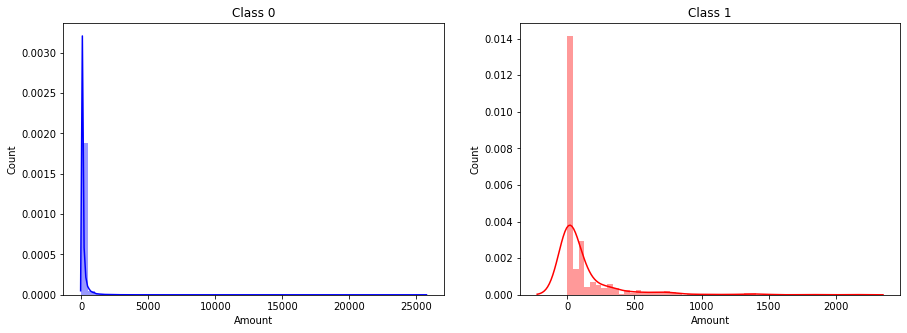

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribution of amount for class 0
sns.distplot(df[df['Class'] == 0]['Amount'], kde=True, ax=axs[0], color='b')
axs[0].set_title('Class 0')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Count')

# Plot distribution of amount for class 1
sns.distplot(df[df['Class'] == 1]['Amount'], kde=True, ax=axs[1], color='r')
axs[1].set_title('Class 1')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Count')

plt.show()


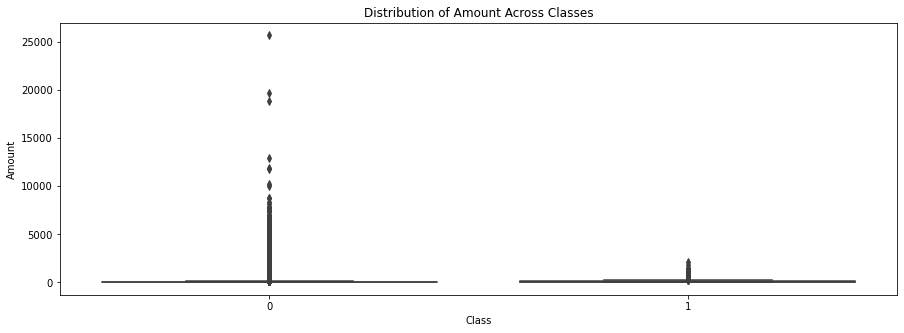

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots to show the distribution of variables across classes
plt.figure(figsize=(15, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Amount Across Classes')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()



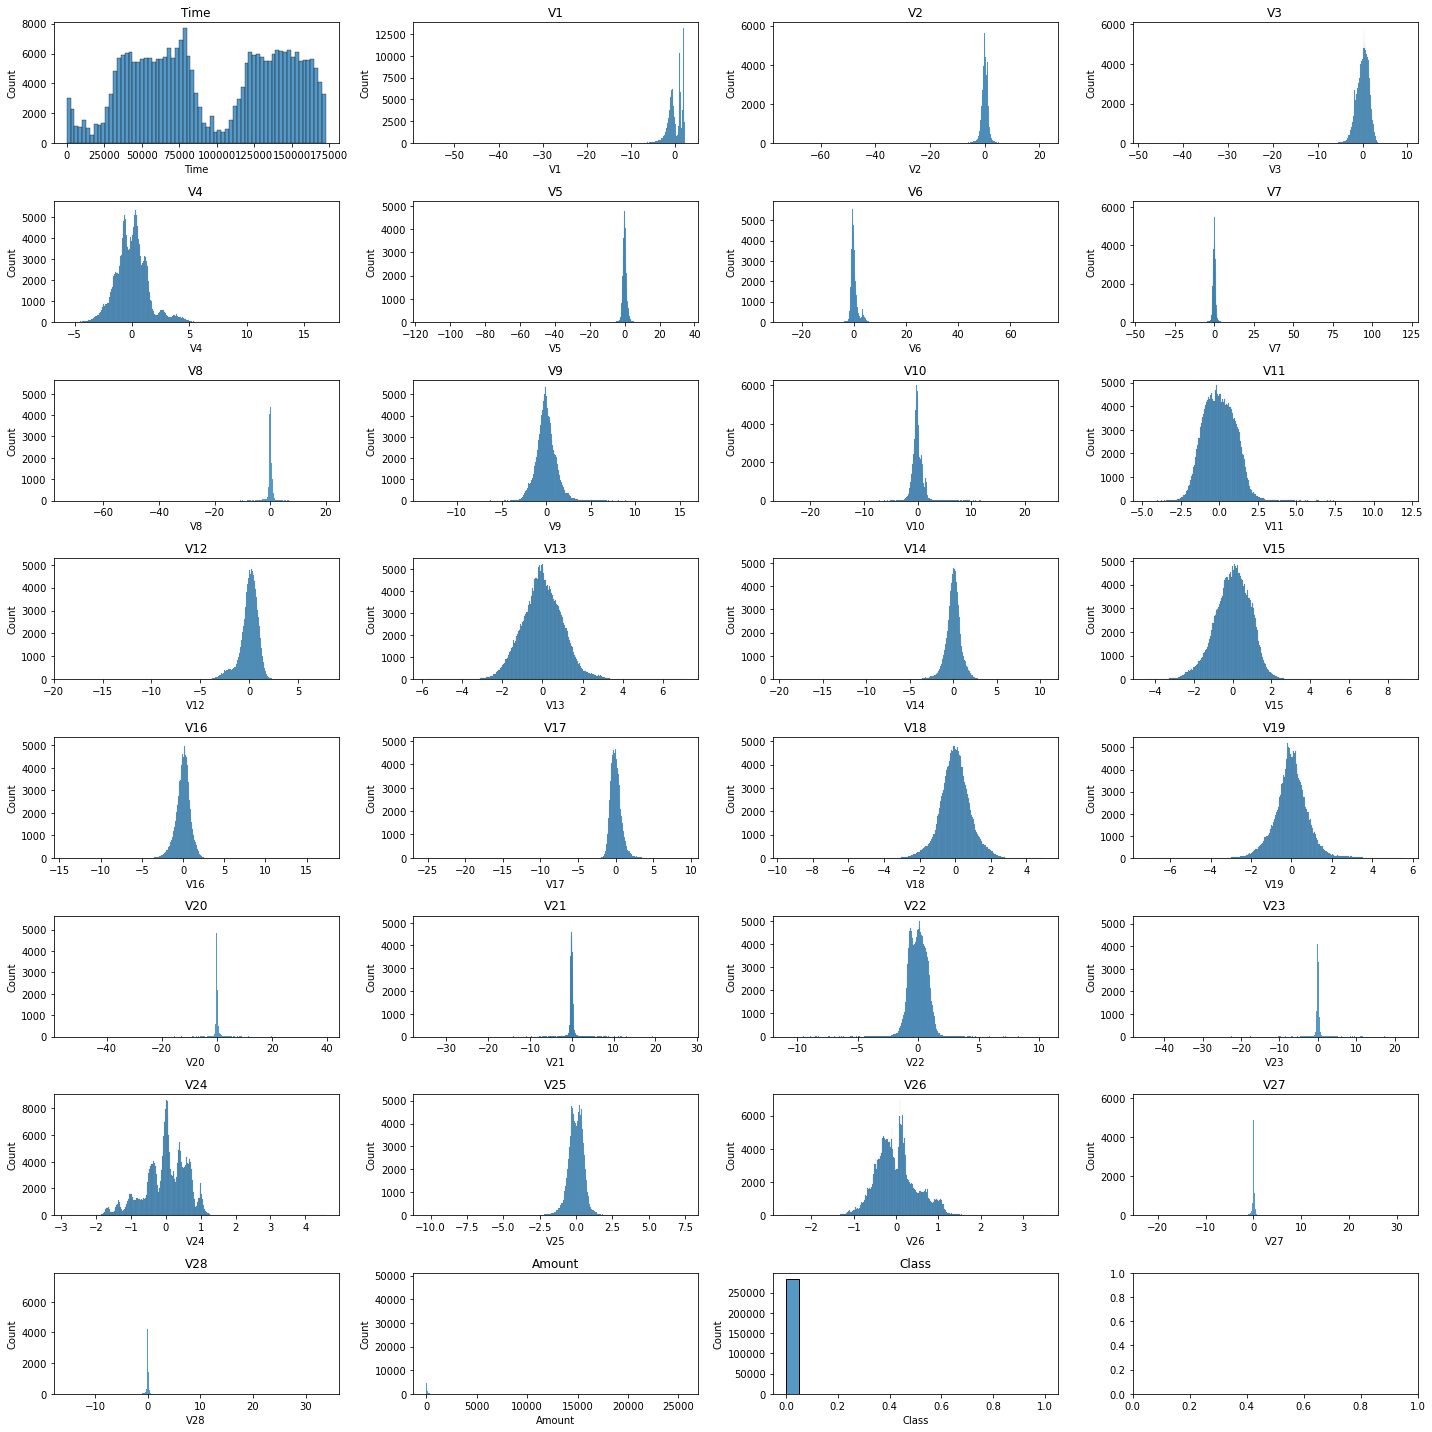

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with multiple plots
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


The above code creates a large subplot with 8 rows and 4 columns, which allows us to visualize the histograms of all the columns in the dataset. The purpose of this plot is to understand the distribution of each variable and whether they are normally distributed or skewed. By examining the histograms, we can see if the data is normally distributed, skewed to the left or right, or has multiple peaks. This information can be useful for preprocessing the data, such as scaling or transforming the variables, and for selecting the appropriate modeling techniques.

# Missing Data and outliers

In [5]:
missing_values = df.isna().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
import numpy as np

# Calculate the IQR (Interquartile Range) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:

# Check if there are still any NaN or infinite values
print(np.sum(np.isnan(df)))
print(np.sum(np.isfinite(df)))


# Models and evaluation

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Split the data into features and target

In [10]:
# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data

In [11]:
# Assign X to input_data and y to target_data
input_data = X
target_data = y

# Calculate the number of samples for validation set as 20% of the total number of samples
num_val_samples = int(len(input_data) * 0.2)

# Create training input and targets by slicing input_data and target_data up to but not including the last 20%
train_input = input_data[:-num_val_samples]
train_targets = target_data[:-num_val_samples]

# Create validation input and targets by slicing the last 20% of input_data and target_data
val_input = input_data[-num_val_samples:]
val_targets = target_data[-num_val_samples:]

# Print the number of training samples and validation samples
print("Number of training samples:", len(train_input))
print("Number of validation samples:", len(val_input))


Number of training samples: 227846
Number of validation samples: 56961


# standardising the data

In [12]:
import numpy as np

# Calculate the mean of the training input
mean = np.mean(train_input, axis=0)

# Subtract the mean from the training and validation input
train_input -= mean
val_input -= mean

# Calculate the standard deviation of the training input
std = np.std(train_input, axis=0)

# Divide the training and validation input by the standard deviation
train_input /= std
val_input /= std


# model definition TensorFlow - Keras

In [26]:
from tensorflow import keras

# Define a Sequential model using Keras
model = keras.Sequential(
    [
        # Add a dense layer with 32 units and ReLU activation, using input shape equal to the number of features
        keras.layers.Dense(32, activation="relu", input_shape=(train_input.shape[-1],)),
        # Add a dense layer with 1 unit and sigmoid activation
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# Print a summary of the model architecture
model.summary()


Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 32)                992       
                                                                 
 dense_167 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


## Metrics defining AND model training

In [14]:
# Define a list of metrics to be used during model training
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

# Compile the model using the Adam optimizer, binary crossentropy loss, and the defined metrics
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

# Define a list of callbacks to be used during model training
callbacks = [keras.callbacks.ModelCheckpoint("model_at_epoch_{epoch}.h5")]

# Train the model on the training data, using the validation data for evaluation
history=model.fit(
    train_input,
    train_targets,
    batch_size=2048,
    epochs=10,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_input, val_targets),
)



Epoch 1/10
112/112 - 6s - loss: 0.0666 - fn: 203.0000 - fp: 5412.0000 - tn: 222017.0000 - tp: 214.0000 - precision: 0.0380 - recall: 0.5132 - val_loss: 0.0045 - val_fn: 44.0000 - val_fp: 1.0000 - val_tn: 56885.0000 - val_tp: 31.0000 - val_precision: 0.9688 - val_recall: 0.4133 - 6s/epoch - 53ms/step
Epoch 2/10
112/112 - 1s - loss: 0.0044 - fn: 129.0000 - fp: 43.0000 - tn: 227386.0000 - tp: 288.0000 - precision: 0.8701 - recall: 0.6906 - val_loss: 0.0033 - val_fn: 33.0000 - val_fp: 3.0000 - val_tn: 56883.0000 - val_tp: 42.0000 - val_precision: 0.9333 - val_recall: 0.5600 - 1s/epoch - 10ms/step
Epoch 3/10
112/112 - 0s - loss: 0.0036 - fn: 118.0000 - fp: 42.0000 - tn: 227387.0000 - tp: 299.0000 - precision: 0.8768 - recall: 0.7170 - val_loss: 0.0029 - val_fn: 25.0000 - val_fp: 5.0000 - val_tn: 56881.0000 - val_tp: 50.0000 - val_precision: 0.9091 - val_recall: 0.6667 - 384ms/epoch - 3ms/step
Epoch 4/10
112/112 - 0s - loss: 0.0031 - fn: 101.0000 - fp: 44.0000 - tn: 227385.0000 - tp: 316.000

# model evaluation

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(val_input)
val_predictions = np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(val_targets, val_predictions)
recall = recall_score(val_targets, val_predictions)
f1 = f1_score(val_targets, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)






Precision:  0.9152542372881356
Recall:  0.72
F1-Score:  0.8059701492537312


### Model Loss

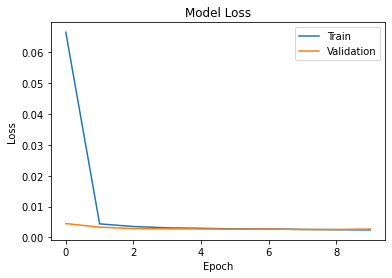

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


### confusion matrix

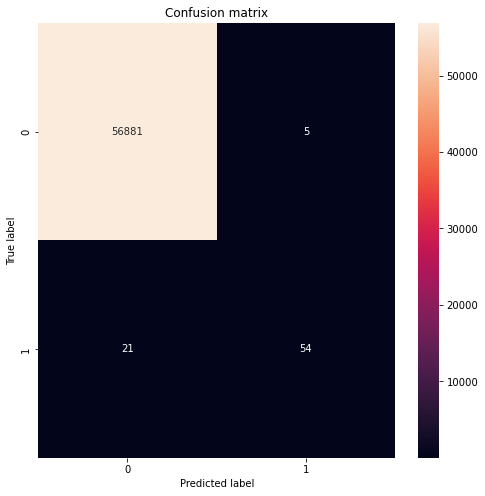

In [18]:
# Plot the confusion matrix
cm = confusion_matrix(val_targets, val_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

### Receiver Operating Characteristic (ROC) Plot

AUC Score:  0.9734541597815514


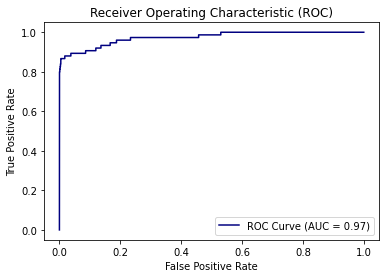

In [19]:
# Calculate the AUC score
auc = roc_auc_score(val_targets, val_probabilities)
print("AUC Score: ", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(val_targets, val_probabilities)
plt.plot(fpr, tpr, color='navy',label="ROC Curve (AUC = %0.2f)" % auc)
plt.legend(loc="lower right")
plt.title("Receiver Operating Characteristic (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


### Precision-Recall curve Plot

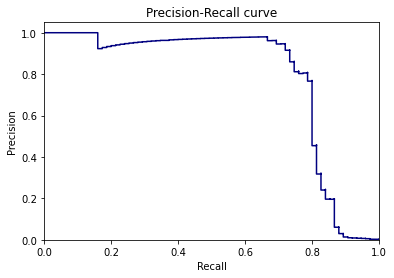

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
val_predictions = model.predict(val_input)

# Flatten the predictions and targets arrays
val_predictions = val_predictions.ravel()
val_targets = val_targets.ravel()

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(val_targets, val_predictions)

# Plot the Precision-Recall curve
plt.step(recall, precision, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()


# Hyperparameter Optimization

The aim of this step is to perform a grid search for the best hyperparameters for the neural network. The grid search is performed using the KerasClassifier and GridSearchCV classes from the scikit-learn library. The build_model function creates a sequential neural network model with the specified hyperparameters (number of hidden units, activation function, optimizer, learning rate). 

The grid search uses a 3-fold cross-validation approach to evaluate the model's performance for different combinations of hyperparameters defined in the "param_grid" dictionary. The best hyperparameters are then stored in the "best_params" variable and are printed.



In [22]:
# Importing required libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the build_model function to create a sequential model with specified hyperparameters
def build_model(hidden_units, activation, optimizer, learning_rate):
    # Creating a sequential model
    model = keras.Sequential(
        [
            # Adding a dense layer with specified number of hidden units and activation function
            keras.layers.Dense(hidden_units, activation=activation, input_shape=(train_input.shape[-1],)),
            # Adding an output layer with sigmoid activation
            keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    # Compiling the model with specified optimizer, loss function, and metrics
    model.compile(
        optimizer=optimizer(learning_rate), loss="binary_crossentropy", metrics=metrics
    )
    # Return the compiled model
    return model

# Create an instance of KerasClassifier to use the build_model function
model = KerasClassifier(build_fn=build_model)

# Define the hyperparameters and their possible values to be used in the grid search
param_grid = {
    "hidden_units": [32, 64, 128],
    "activation": ["relu"],
    "optimizer": [keras.optimizers.Adam],
    "learning_rate": [1e-2, 1e-3, 1e-4],
    "batch_size": [2048, 4096, 8192],
    "epochs": [10],
}

# Create an instance of GridSearchCV to perform the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Fit the grid search to the training data
grid_search.fit(train_input, train_targets)

# Store the best hyperparameters found in the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters found
print("Best hyperparameters found: ", best_params)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
Epoch 1/10
75/75 [==============================] - 3s 4ms/step - loss: 0.0772 - fn: 152.0000 - fp: 3542.0000 - tn: 205008.0000 - tp: 156.0000 - precision: 0.0422 - recall: 0.5065
Epoch 2/10
75/75 [==============================] - 0s 4ms/step - loss: 0.0045 - fn: 66.0000 - fp: 13.0000 - tn: 151651.0000 - tp: 167.0000 - precision: 0.9278 - recall: 0.7167
Epoch 3/10
75/75 [==============================] - 0s 7ms/step - loss: 0.0034 - fn: 61.0000 - fp: 11.0000 - tn: 151653.0000 - tp: 172.0000 - precision: 0.9399 - recall: 0.7382
Epoch 4/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0030 - fn: 60.0000 - fp: 10.0000 - tn: 151654.0000 - tp: 173.0000 - precision: 0.9454 - recall: 0.7425
Epoch 5/10
75/75 [==============================] - 0s 3ms/step - loss: 0.0027 - fn: 58.0000 - fp: 10.0000 - tn: 151654.0000 - tp: 175.0000 - precision: 0.9459 - recall: 0.7511
Epoch 6/10
75/75 [==============================] 

75/75 [==============================] - 0s 3ms/step - loss: 0.2622 - fn: 249.0000 - fp: 1181.0000 - tn: 150442.0000 - tp: 25.0000 - precision: 0.0207 - recall: 0.0912
Epoch 10/10
38/38 [==============================] - 2s 2ms/step - loss: 0.2753 - fn: 140.0000 - fp: 279.0000 - tn: 75527.0000 - tp: 3.0000 - precision: 0.0106 - recall: 0.0210    
[CV] END activation=relu, batch_size=2048, epochs=10, hidden_units=32, learning_rate=0.0001, optimizer=<class 'keras.optimizer_v2.adam.Adam'>; total time=   9.4s
Epoch 1/10
75/75 [==============================] - 4s 14ms/step - loss: 0.7476 - fn: 179.0000 - fp: 69349.0000 - tn: 158028.0000 - tp: 291.0000 - precision: 0.0042 - recall: 0.6191
Epoch 2/10
75/75 [==============================] - 0s 6ms/step - loss: 0.6425 - fn: 50.0000 - fp: 50912.0000 - tn: 100659.0000 - tp: 277.0000 - precision: 0.0054 - recall: 0.8471
Epoch 3/10
75/75 [==============================] - 0s 4ms/step - loss: 0.5525 - fn: 59.0000 - fp: 35221.0000 - tn: 116350.0000

75/75 [==============================] - 1s 7ms/step - loss: 0.2264 - fn: 233.0000 - fp: 1.0000 - tn: 151663.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/10
75/75 [==============================] - 1s 15ms/step - loss: 0.1904 - fn: 233.0000 - fp: 0.0000e+00 - tn: 151664.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/10
75/75 [==============================] - 0s 5ms/step - loss: 0.1614 - fn: 233.0000 - fp: 0.0000e+00 - tn: 151664.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/10
75/75 [==============================] - 1s 13ms/step - loss: 0.1379 - fn: 233.0000 - fp: 0.0000e+00 - tn: 151664.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 9/10
75/75 [==============================] - 1s 8ms/step - loss: 0.1186 - fn: 233.0000 - fp: 0.0000e+00 - tn: 151664.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 10/10
38/38 [==============================] - 1s 2m

Epoch 1/10
75/75 [==============================] - 3s 6ms/step - loss: 0.2493 - fn: 238.0000 - fp: 8636.0000 - tn: 218741.0000 - tp: 232.0000 - precision: 0.0262 - recall: 0.4936
Epoch 2/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0344 - fn: 151.0000 - fp: 39.0000 - tn: 151532.0000 - tp: 176.0000 - precision: 0.8186 - recall: 0.5382
Epoch 3/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0156 - fn: 141.0000 - fp: 39.0000 - tn: 151532.0000 - tp: 186.0000 - precision: 0.8267 - recall: 0.5688
Epoch 4/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0101 - fn: 131.0000 - fp: 39.0000 - tn: 151532.0000 - tp: 196.0000 - precision: 0.8340 - recall: 0.5994
Epoch 5/10
75/75 [==============================] - 1s 16ms/step - loss: 0.0076 - fn: 123.0000 - fp: 40.0000 - tn: 151531.0000 - tp: 204.0000 - precision: 0.8361 - recall: 0.6239
Epoch 6/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0063 - fn: 112.0000 - fp: 39.000

38/38 [==============================] - 1s 16ms/step - loss: 0.0450 - fn: 97.0000 - fp: 17.0000 - tn: 151647.0000 - tp: 136.0000 - precision: 0.8889 - recall: 0.5837
Epoch 10/10
19/19 [==============================] - 2s 4ms/step - loss: 0.0622 - fn: 42.0000 - fp: 51.0000 - tn: 75714.0000 - tp: 142.0000 - precision: 0.7358 - recall: 0.7717
[CV] END activation=relu, batch_size=4096, epochs=10, hidden_units=32, learning_rate=0.001, optimizer=<class 'keras.optimizer_v2.adam.Adam'>; total time=  10.2s
Epoch 1/10
38/38 [==============================] - 4s 6ms/step - loss: 0.6480 - fn: 76.0000 - fp: 53339.0000 - tn: 174049.0000 - tp: 382.0000 - precision: 0.0071 - recall: 0.8341
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3295 - fn: 52.0000 - fp: 6442.0000 - tn: 145181.0000 - tp: 222.0000 - precision: 0.0333 - recall: 0.8102
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1876 - fn: 79.0000 - fp: 225.0000 - tn: 151398.0000 - tp: 195.

38/38 [==============================] - 0s 6ms/step - loss: 0.0035 - fn: 98.0000 - fp: 25.0000 - tn: 151546.0000 - tp: 229.0000 - precision: 0.9016 - recall: 0.7003
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0031 - fn: 88.0000 - fp: 32.0000 - tn: 151539.0000 - tp: 239.0000 - precision: 0.8819 - recall: 0.7309
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0029 - fn: 83.0000 - fp: 22.0000 - tn: 151549.0000 - tp: 244.0000 - precision: 0.9173 - recall: 0.7462
Epoch 8/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0030 - fn: 79.0000 - fp: 28.0000 - tn: 151543.0000 - tp: 248.0000 - precision: 0.8986 - recall: 0.7584
Epoch 9/10
38/38 [==============================] - 1s 17ms/step - loss: 0.0028 - fn: 75.0000 - fp: 26.0000 - tn: 151545.0000 - tp: 252.0000 - precision: 0.9065 - recall: 0.7706
Epoch 10/10
19/19 [==============================] - 2s 10ms/step - loss: 0.0066 - fn: 20.0000 - fp: 49.0000 - tn: 75809.000

38/38 [==============================] - 3s 19ms/step - loss: 0.0715 - fn: 205.0000 - fp: 3851.0000 - tn: 223537.0000 - tp: 253.0000 - precision: 0.0616 - recall: 0.5524
Epoch 2/10
38/38 [==============================] - 1s 16ms/step - loss: 0.0037 - fn: 87.0000 - fp: 32.0000 - tn: 151591.0000 - tp: 187.0000 - precision: 0.8539 - recall: 0.6825
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0033 - fn: 73.0000 - fp: 32.0000 - tn: 151591.0000 - tp: 201.0000 - precision: 0.8627 - recall: 0.7336
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.0029 - fn: 70.0000 - fp: 31.0000 - tn: 151592.0000 - tp: 204.0000 - precision: 0.8681 - recall: 0.7445
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.0028 - fn: 70.0000 - fp: 27.0000 - tn: 151596.0000 - tp: 204.0000 - precision: 0.8831 - recall: 0.7445
Epoch 6/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0028 - fn: 69.0000 - fp: 36.0000 - tn: 151587.

38/38 [==============================] - 1s 32ms/step - loss: 0.2921 - fn: 242.0000 - fp: 170.0000 - tn: 151401.0000 - tp: 85.0000 - precision: 0.3333 - recall: 0.2599
Epoch 9/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2582 - fn: 235.0000 - fp: 70.0000 - tn: 151501.0000 - tp: 92.0000 - precision: 0.5679 - recall: 0.2813
Epoch 10/10
19/19 [==============================] - 2s 4ms/step - loss: 0.3766 - fn: 65.0000 - fp: 635.0000 - tn: 75223.0000 - tp: 25.0000 - precision: 0.0379 - recall: 0.2778
[CV] END activation=relu, batch_size=4096, epochs=10, hidden_units=128, learning_rate=0.0001, optimizer=<class 'keras.optimizer_v2.adam.Adam'>; total time=  10.5s
Epoch 1/10
19/19 [==============================] - 3s 5ms/step - loss: 0.1450 - fn: 296.0000 - fp: 3595.0000 - tn: 223927.0000 - tp: 27.0000 - precision: 0.0075 - recall: 0.0836
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0095 - fn: 109.0000 - fp: 13.0000 - tn: 151651.0000 - tp: 124.

19/19 [==============================] - 1s 31ms/step - loss: 1.0379 - fn: 30.0000 - fp: 112831.0000 - tn: 38792.0000 - tp: 244.0000 - precision: 0.0022 - recall: 0.8905
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 1.0037 - fn: 31.0000 - fp: 109572.0000 - tn: 42051.0000 - tp: 243.0000 - precision: 0.0022 - recall: 0.8869
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.9705 - fn: 35.0000 - fp: 106061.0000 - tn: 45562.0000 - tp: 239.0000 - precision: 0.0022 - recall: 0.8723
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.9384 - fn: 36.0000 - fp: 102430.0000 - tn: 49193.0000 - tp: 238.0000 - precision: 0.0023 - recall: 0.8686
Epoch 8/10
19/19 [==============================] - 0s 6ms/step - loss: 0.9072 - fn: 37.0000 - fp: 98651.0000 - tn: 52972.0000 - tp: 237.0000 - precision: 0.0024 - recall: 0.8650
Epoch 9/10
19/19 [==============================] - 0s 9ms/step - loss: 0.8771 - fn: 39.0000 - fp: 94666.0000 

Epoch 1/10
19/19 [==============================] - 3s 10ms/step - loss: 0.8172 - fn: 50.0000 - fp: 91786.0000 - tn: 135736.0000 - tp: 273.0000 - precision: 0.0030 - recall: 0.8452
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 0.7718 - fn: 21.0000 - fp: 83421.0000 - tn: 68243.0000 - tp: 212.0000 - precision: 0.0025 - recall: 0.9099
Epoch 3/10
19/19 [==============================] - 1s 31ms/step - loss: 0.7287 - fn: 22.0000 - fp: 74677.0000 - tn: 76987.0000 - tp: 211.0000 - precision: 0.0028 - recall: 0.9056
Epoch 4/10
19/19 [==============================] - 1s 32ms/step - loss: 0.6880 - fn: 24.0000 - fp: 65605.0000 - tn: 86059.0000 - tp: 209.0000 - precision: 0.0032 - recall: 0.8970
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 0.6497 - fn: 29.0000 - fp: 56416.0000 - tn: 95248.0000 - tp: 204.0000 - precision: 0.0036 - recall: 0.8755
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 0.6137 - fn: 34.0000 - fp: 47

10/10 [==============================] - 2s 14ms/step - loss: 0.0070 - fn: 43.0000 - fp: 38.0000 - tn: 75727.0000 - tp: 141.0000 - precision: 0.7877 - recall: 0.7663
[CV] END activation=relu, batch_size=8192, epochs=10, hidden_units=128, learning_rate=0.01, optimizer=<class 'keras.optimizer_v2.adam.Adam'>; total time=  17.8s
Epoch 1/10
19/19 [==============================] - 9s 14ms/step - loss: 0.1326 - fn: 216.0000 - fp: 7065.0000 - tn: 220323.0000 - tp: 242.0000 - precision: 0.0331 - recall: 0.5284
Epoch 2/10
19/19 [==============================] - 0s 21ms/step - loss: 0.0054 - fn: 132.0000 - fp: 36.0000 - tn: 151587.0000 - tp: 142.0000 - precision: 0.7978 - recall: 0.5182
Epoch 3/10
19/19 [==============================] - 2s 96ms/step - loss: 0.0040 - fn: 93.0000 - fp: 40.0000 - tn: 151583.0000 - tp: 181.0000 - precision: 0.8190 - recall: 0.6606
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0036 - fn: 84.0000 - fp: 40.0000 - tn: 151583.0000 - tp: 190

19/19 [==============================] - 0s 9ms/step - loss: 0.4538 - fn: 267.0000 - fp: 5700.0000 - tn: 145871.0000 - tp: 60.0000 - precision: 0.0104 - recall: 0.1835
Epoch 8/10
19/19 [==============================] - 1s 57ms/step - loss: 0.4197 - fn: 271.0000 - fp: 3372.0000 - tn: 148199.0000 - tp: 56.0000 - precision: 0.0163 - recall: 0.1713
Epoch 9/10
19/19 [==============================] - 0s 9ms/step - loss: 0.3889 - fn: 272.0000 - fp: 1999.0000 - tn: 149572.0000 - tp: 55.0000 - precision: 0.0268 - recall: 0.1682
Epoch 10/10
10/10 [==============================] - 2s 3ms/step - loss: 0.5113 - fn: 75.0000 - fp: 6595.0000 - tn: 69263.0000 - tp: 15.0000 - precision: 0.0023 - recall: 0.1667
[CV] END activation=relu, batch_size=8192, epochs=10, hidden_units=128, learning_rate=0.0001, optimizer=<class 'keras.optimizer_v2.adam.Adam'>; total time=   8.2s
Epoch 1/10
112/112 [==============================] - 3s 3ms/step - loss: 0.0310 - fn: 257.0000 - fp: 7413.0000 - tn: 295874.0000 - 

In [23]:
# Print the best hyperparameters found
print("Best hyperparameters found: ", best_params)

Best hyperparameters found:  {'activation': 'relu', 'batch_size': 2048, 'epochs': 10, 'hidden_units': 32, 'learning_rate': 0.01, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}


# Computing Class Weights

This code block computes the class weights for the target labels in the training data. The class_weight argument is set to "balanced" which means the weight of each class is inversely proportional to the frequency of the class in the input data. 

This is done to handle class imbalance in the training data. The resulting class_weights dictionary can then be used during training to weight the loss function differently for each class.

In [24]:
import numpy as np
from sklearn.utils import class_weight

train_targets 
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_targets), y=train_targets)
class_weights = dict(enumerate(class_weights))

print(class_weights)


{0: 0.500916769629203, 1: 273.1966426858513}


# Train the model with Class Weights

In [73]:
# Define a list of metrics to be used during model training
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

# Compile the model using the Adam optimizer, binary crossentropy loss, and the defined metrics
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

# Define a list of callbacks to be used during model training
callbacks = [keras.callbacks.ModelCheckpoint("model_at_epoch_{epoch}.h5")]

# Train the model on the training data, using the validation data for evaluation
history=model.fit(
    train_input,
    train_targets,
    batch_size=2048,
    epochs=11,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_input, val_targets),
    class_weight=class_weights
)


Epoch 1/11
112/112 - 7s - loss: 0.5346 - fn: 15.0000 - fp: 7371.0000 - tn: 220058.0000 - tp: 402.0000 - precision: 0.0517 - recall: 0.9640 - val_loss: 0.1272 - val_fn: 12.0000 - val_fp: 1324.0000 - val_tn: 55562.0000 - val_tp: 63.0000 - val_precision: 0.0454 - val_recall: 0.8400 - 7s/epoch - 66ms/step
Epoch 2/11
112/112 - 1s - loss: 0.3065 - fn: 6.0000 - fp: 8194.0000 - tn: 219235.0000 - tp: 411.0000 - precision: 0.0478 - recall: 0.9856 - val_loss: 0.1290 - val_fn: 12.0000 - val_fp: 1385.0000 - val_tn: 55501.0000 - val_tp: 63.0000 - val_precision: 0.0435 - val_recall: 0.8400 - 1s/epoch - 10ms/step
Epoch 3/11
112/112 - 1s - loss: 0.2549 - fn: 2.0000 - fp: 7863.0000 - tn: 219566.0000 - tp: 415.0000 - precision: 0.0501 - recall: 0.9952 - val_loss: 0.1078 - val_fn: 12.0000 - val_fp: 1300.0000 - val_tn: 55586.0000 - val_tp: 63.0000 - val_precision: 0.0462 - val_recall: 0.8400 - 1s/epoch - 12ms/step
Epoch 4/11
112/112 - 2s - loss: 0.2171 - fn: 1.0000 - fp: 7522.0000 - tn: 219907.0000 - tp: 4

## model evaluation

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score,recall_score
import seaborn as sns


# Use the model to make predictions on the validation data
val_probabilities = model.predict(val_input)
val_predictions = np.round(val_probabilities)

# Calculate the precision, recall, and f1-score
precision = precision_score(val_targets, val_predictions)
recall = recall_score(val_targets, val_predictions)
f1 = f1_score(val_targets, val_predictions)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)


Precision:  0.07093023255813953
Recall:  0.8133333333333334
F1-Score:  0.13048128342245988


### Model Loss

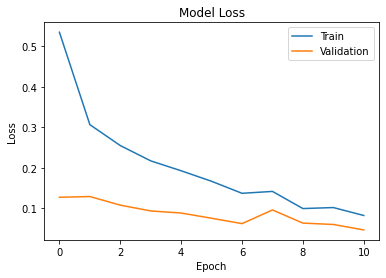

In [75]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


### Receiver Operating Characteristic (ROC) Plot

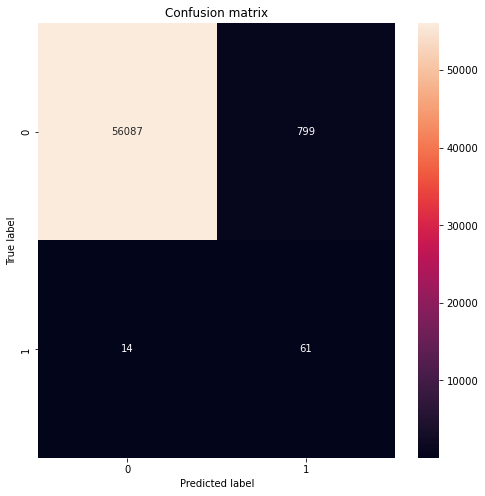

In [76]:

# Plot the confusion matrix
cm = confusion_matrix(val_targets, val_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


### Receiver Operating Characteristic (ROC) Plot

AUC Score:  0.9657455261399994


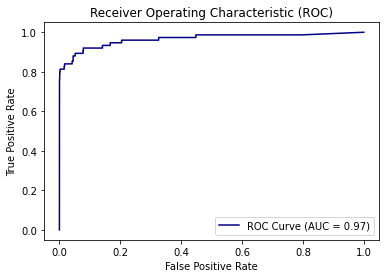

In [77]:
# Calculate the AUC score
auc = roc_auc_score(val_targets, val_probabilities)
print("AUC Score: ", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(val_targets, val_probabilities)
plt.plot(fpr, tpr, color='navy',label="ROC Curve (AUC = %0.2f)" % auc)
plt.legend(loc="lower right")
plt.title("Receiver Operating Characteristic (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



### Precision-Recall curve Plot

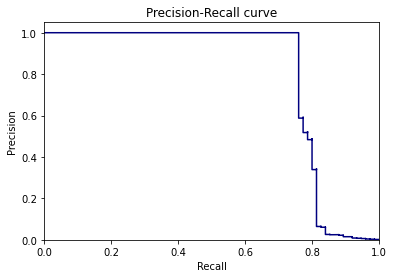

In [78]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
val_predictions = model.predict(val_input)

# Flatten the predictions and targets arrays
val_predictions = val_predictions.ravel()
val_targets = val_targets.ravel()

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(val_targets, val_predictions)

# Plot the Precision-Recall curve
plt.step(recall, precision, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()


# Summary:

The code performs several operations on the credit card dataset, including: data preprocessing (outlier removal, missing value check), data visualization, and data normalization. Then, a 2-layer neural network model is defined and trained using the Adam optimizer and binary crossentropy loss. The model performance is evaluated by calculating precision, recall, and F1-score of the predictions on the validation data. 

The code also performs a grid search to find the best hyperparameters, and the best hyperparameters are printed. The final step is to visualize the model performance using loss plots, confusion matrix, ROC curve, and precision-recall curve.